# Neural Networks

(example from sklearn and https://github.com/amirziai/deep-learning-coursera)

## The problem: determine if an image has a cat or not, given labeled data

|**Cat**| <img src="images/cat1.jpg" width="150"> || <img src="images/cat2.png" width="150"> |



|**Non Cat**| <img src="images/no_cat1.jpeg" width="150"> || <img src="images/no_cat2.jpg" width="150">  |

In [3]:
import numpy as np

from sklearn import neural_network # se puede usar pero no es lo más óptimo
from lr_utils import load_dataset
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Abro el dataset de imágenes
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [9]:
X_train_orig[0].shape

(64, 64, 3)

# NORMALIZATION

In [5]:
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1) # hago un reshape para convertir la imgen en un tensor
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1)
X_train = X_train/255. # 255 es el valor mayor de intensidad de pixeles
X_test = X_test/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [7]:
X_train.shape

(209, 12288)

y = [1], it's a 'cat' picture.


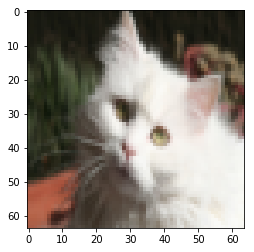

In [6]:
index = 102
# print (X_train[index].reshape(()))
plt.imshow(X_train_orig[index])
print ("y = " + str(Y_train[index]) + ", it's a '" + classes[np.squeeze(Y_train[index])].decode("utf-8") +  "' picture.")

## sklearn implementation

In [10]:
# clase de sklearn= MLPClassifier
clf = neural_network.MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5, 
    hidden_layer_sizes=(5, 2), # cantidad de neuronas de las capas intermedias
    random_state=1, 
    max_iter=5000)

In [11]:
# Entrenamiento
clf.fit(X_train, Y_train.ravel())

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=5000,
              random_state=1, solver='lbfgs')

In [13]:
# Calculo las predicciones en el conjunto de train
predictions = clf.predict(X_train)
print ('Accuracy: %d ' % ((np.sum(Y_train.ravel() == predictions))/float(Y_train.size)*100))

Accuracy: 80 


In [15]:
# Calculo las predicciones en el conjunto de test
predictions = clf.predict(X_test)
print ('Accuracy: %d ' % ((np.sum(Y_test.ravel() == predictions))/float(Y_test.size)*100))

predictions, Y_test.ravel()

Accuracy: 80 


(array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 0], dtype=int64),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0], dtype=int64))

# What if we implement it?

In [16]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [17]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [18]:
def propagate(w, b, X, Y):
    m = X.shape[1]    

    # FORWARD PROPAGATION -> para calcular la funcion de costo
    A = sigmoid(np.dot(w.T, X) + b)                                          # compute activation
    cost = (-1.0 / m) * np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A))  # compute cost

    # BACKWARD PROPAGATION -> para calcular el gradiente
    dw = (1.0 / m) * np.dot(X, (A - Y).T)
    db = (1.0 / m) * np.sum(A - Y)

    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost # retorna el gradiente y el costo

In [19]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient
        grads, cost = propagate(w, b, X, Y)
        if i % 100 == 0:
            costs.append(cost)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [20]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction[A >= 0.5] = 1 # threshold 0.5 si es mayoy lo clasifico como 1
    Y_prediction[A < 0.5] = 0 # si es menor de 0.5 lo clasifico como 0
    return Y_prediction

In [21]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [22]:
d = model(X_train.T, Y_train.ravel(), X_test.T, Y_test.ravel(), num_iterations = 5000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.591289
Cost after iteration 200: 0.555796
Cost after iteration 300: 0.528977
Cost after iteration 400: 0.506881
Cost after iteration 500: 0.487880
Cost after iteration 600: 0.471108
Cost after iteration 700: 0.456046
Cost after iteration 800: 0.442350
Cost after iteration 900: 0.429782
Cost after iteration 1000: 0.418164
Cost after iteration 1100: 0.407362
Cost after iteration 1200: 0.397269
Cost after iteration 1300: 0.387802
Cost after iteration 1400: 0.378888
Cost after iteration 1500: 0.370471
Cost after iteration 1600: 0.362500
Cost after iteration 1700: 0.354934
Cost after iteration 1800: 0.347737
Cost after iteration 1900: 0.340877
Cost after iteration 2000: 0.334326
Cost after iteration 2100: 0.328061
Cost after iteration 2200: 0.322060
Cost after iteration 2300: 0.316304
Cost after iteration 2400: 0.310776
Cost after iteration 2500: 0.305460
Cost after iteration 2600: 0.300342
Cost after iteration 2700: 0.295411
Cost

y = 1, you predicted that it is a "cat" picture.


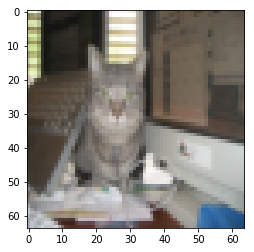

In [23]:
index = 7 #30
num_px = X_train_orig[index].shape[0]

plt.imshow(X_test[index,:].reshape((num_px, num_px, 3)))
print ("y = " + str(Y_test[index,0]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

# Keras

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation="sigmoid"),
    Dropout(0.3),
    Dense(16, activation="sigmoid"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(
    optimizer="sgd",
    loss="binary_crossentropy",
    metrics="acc"
)
model.summary()

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test, Y_test))

* Para evitar el overfitting, primero se reduce la cantidad de capas
* Luego se prueba reducir la cantidad de neuronas
* Las neuronas se suelen setear en valores de potencias de 2